# Application of clustering in biological and chemical data 

* The data we will use is from <https://github.com/probml/pmtk3/tree/master/data/yeastData310>.

* These are (probably) subsets of the survey data reported at <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE28>, Joseph L. Derisi, Vishwanath R. Iyer, Patrick O. Brown (1997) Exploring the Metabolic and Genetic Control of Gene Expression on a Genomic Scale, Science, Vol 278, Issue 5338, 680-686.

* The columns refer to the expression or suppression (expression, repression) of genes at specific times from the beginning of the observation.

In [1]:
import pandas as pd

yeast = pd.read_csv('yeastData310.csv', index_col=0)
yeast

,gene,0.0,9.5,11.5,13.5,15.5,18.5,20.5
0,YAL012W,0.157,0.175,0.467,-0.379,-0.520,-1.279,-2.125
1,YAL034C,-0.235,0.487,-0.184,-0.669,-1.006,2.369,2.611
2,YAL061W,-0.532,0.028,-0.333,-0.102,1.172,2.087,0.992
3,YBR048W,0.224,0.274,-0.002,-0.211,-0.760,-1.524,-2.145
4,YBR052C,0.049,0.105,0.650,1.310,0.917,2.401,1.715
...,...,...,...,...,...,...,...,...
305,YPL273W,0.151,0.326,2.672,0.075,0.487,-1.092,-1.306
306,YPR136C,0.158,-0.130,-0.880,-0.693,-1.020,-2.387,-1.009
307,YPR156C,0.074,0.535,1.603,1.461,1.580,0.933,2.044
308,YPR184W,-0.195,0.165,-0.333,0.421,0.858,1.633,3.028


* To get an idea, we can make a graph with the evolution for each gene separately.

* We will not use the first column of the `DataFrame` (which identifies the gene itself).

<Figure size 720x576 with 0 Axes>

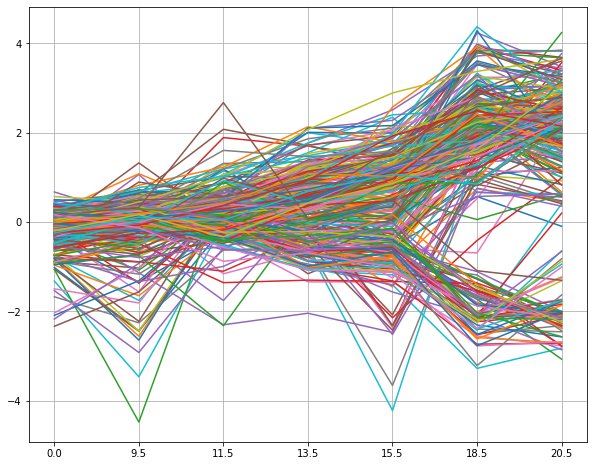

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
gene_exp = yeast.iloc[:, 1:]
gene_exp.T.plot(figsize=(10, 8), legend=None)
plt.grid()

* To locate the optimal number of clusters we start with the elbow method.

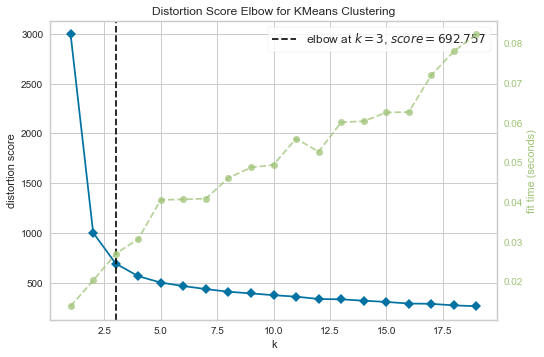

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,20))

visualizer.fit(gene_exp)
visualizer.show()

* We can see what silhouette analysis gives us too.

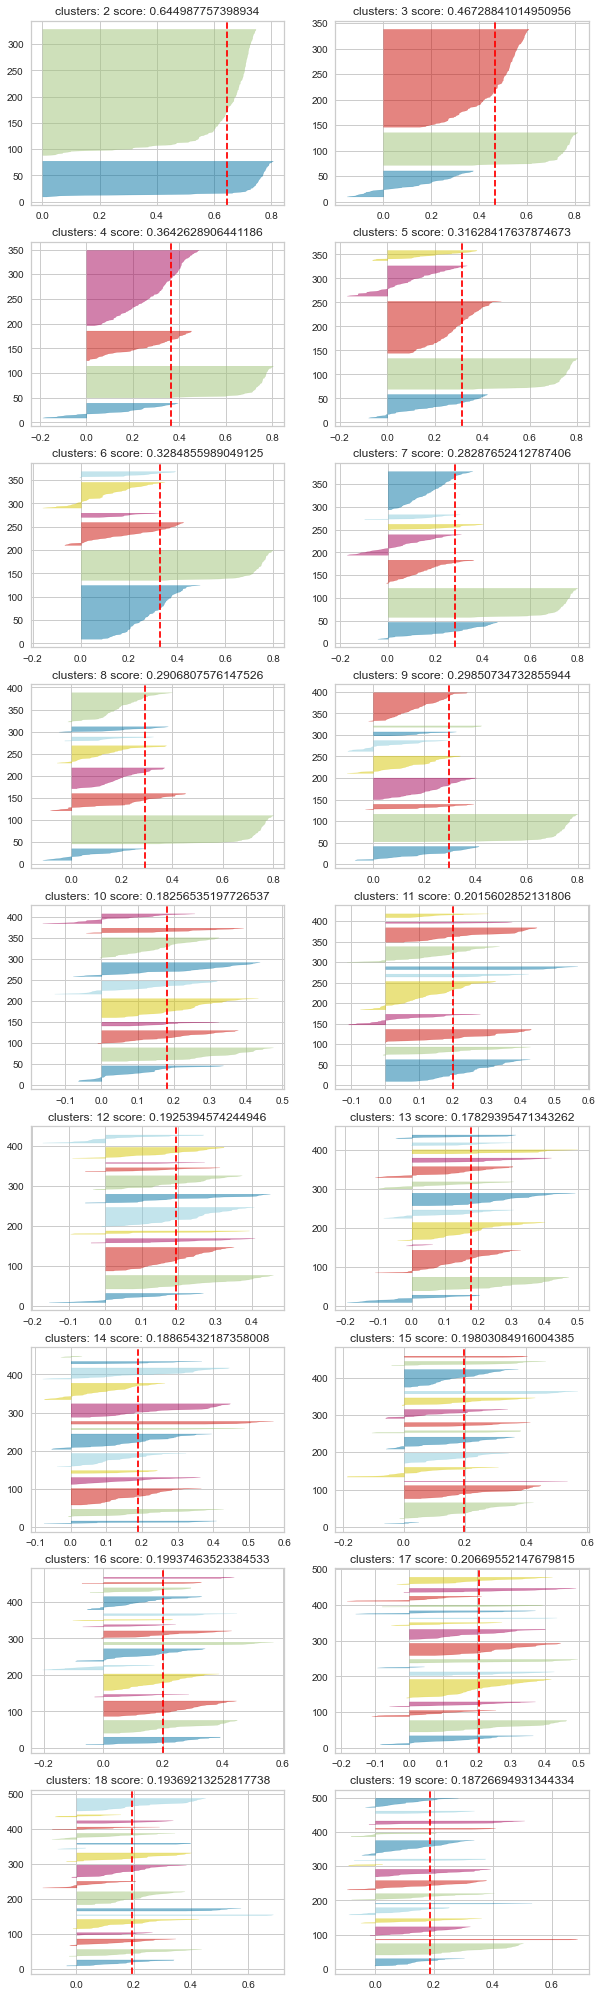

In [4]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(gene_exp)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

* The optimal number is now two, different from the one given by the elbow method...

In [5]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.644987757398934),
 (3, 0.46728841014950956),
 (4, 0.3642628906441186),
 (6, 0.3284855989049125),
 (5, 0.31628417637874673),
 (9, 0.29850734732855944),
 (8, 0.2906807576147526),
 (7, 0.28287652412787406),
 (17, 0.20669552147679815),
 (11, 0.2015602852131806),
 (16, 0.19937463523384533),
 (15, 0.19803084916004385),
 (18, 0.19369213252817738),
 (12, 0.1925394574244946),
 (14, 0.18865432187358008),
 (19, 0.18726694931344334),
 (10, 0.18256535197726537),
 (13, 0.17829395471343262)]

* We will use the k-means algorithm for two clusters.

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(gene_exp)

* Since the measurements are made over time, we can diagram the clusters as temporal evolutions, based on the centroid of each cluster.

* Each centroid gives the value of the expression for a specific time (dimension).

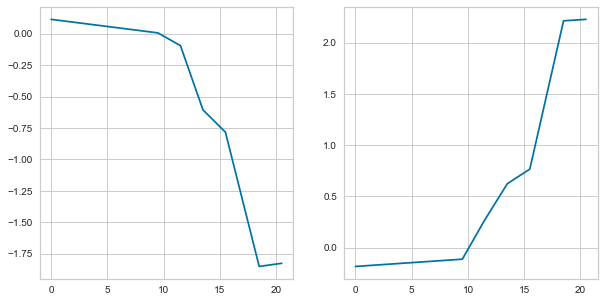

In [7]:
plt.figure(figsize=(2 * 5, 1 * 5))
xs = [ float (x) for x in gene_exp.columns ]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 2, i + 1)
    plt.plot(xs, cluster_centers)

* Let's try with three clusters as well.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(gene_exp)

* And the clusters in the evolution of time.

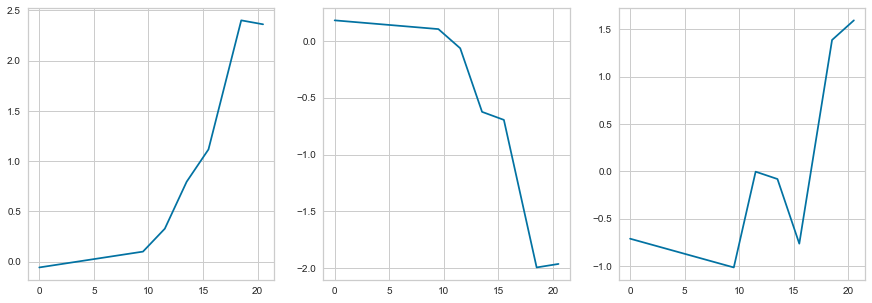

In [9]:
plt.figure(figsize=(3 * 5, 1 * 5))
xs = [ float (x) for x in gene_exp.columns ]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 3, i + 1)
    plt.plot(xs, cluster_centers)


* Let's go to another type of fermentation, the alcoholic one.

* We will use the data on wines from Portugal that we have seen before.

In [10]:
wines = pd.read_csv("wines_color.csv")
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1


* We will see if we can find two clusters, and if they correspond to the color of the wine.

In [11]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
wines_scaled = standard_scaler.fit_transform(wines.loc[:, 'fixed acidity':'alcohol'])
kmeans = KMeans(n_clusters=2, random_state=0).fit(wines_scaled)

* To visualize the clusters, we will use our familiar PCA method.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wines_transformed = pca.fit_transform(wines_scaled)

* Here's how it is.

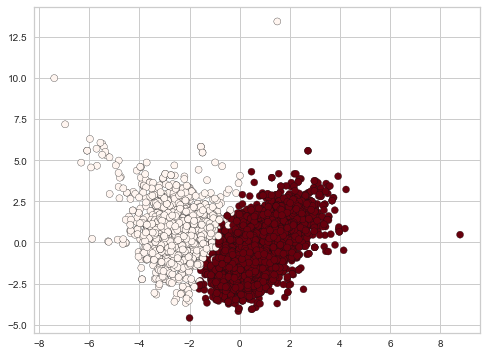

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:,0], y=wines_transformed[:,1], c=kmeans.labels_, 
            edgecolor='k', cmap='Reds')
plt.grid(visible=True)

* Let's also look at the real situation (since we know it).

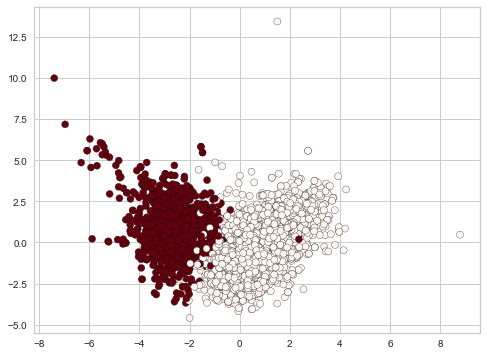

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:,0], y=wines_transformed[:,1], c=wines['color'], 
            edgecolor='k', cmap='Reds')
plt.grid(visible=True)

* It seems that the two clusters match the color of the wine very well.

* Except of course the clusters don't know that they refer to color.

* The 1's and 0's of the clusters are inverses of the `color` column in our data.

* Let's confirm it.

In [15]:
import numpy as np
from sklearn import metrics

labels = np.where(kmeans.labels_ == 1, 0, 1)
metrics.accuracy_score(labels, wines['color'])

0.9861474526704633